In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from hmmlearn import hmm  

In [5]:
# state space  
states_space = ["Sunny", "Rainy", "Winter"]  
no_of_states = len(states_space)  
print('Number of hidden states :',no_of_states)  
# observation space  
observations_space = ["Dry", "Wet", "Humid"]  
no_of_observations = len(observations_space)  
print('Number of observations  :',no_of_observations)  

Number of hidden states : 3
Number of observations  : 3


In [10]:
# state distribution  
state_probab = np.array([0.5, 0.4, 0.1])  
print("The State probability: ", state_probab)  
    
# transition probabilities  
transition_probab = np.array([[0.2, 0.3, 0.5],  
                                   [0.3, 0.4, 0.3],  
                                   [0.5, 0.3, 0.2]])  
print("\nThe Transition probability:\n", transition_probab)  
# emission probability  
emission_probab = np.array([[0.2, 0.1, 0.7],  
                                 [0.2, 0.5, 0.3],  
                                 [0.4, 0.2, 0.4]])  
print("\nThe Emission probability:\n", emission_probab)  

The State probability:  [0.5 0.4 0.1]

The Transition probability:
 [[0.2 0.3 0.5]
 [0.3 0.4 0.3]
 [0.5 0.3 0.2]]

The Emission probability:
 [[0.2 0.1 0.7]
 [0.2 0.5 0.3]
 [0.4 0.2 0.4]]


In [7]:
model = hmm.CategoricalHMM(n_components=no_of_states)  
model.startprob_ = state_probab  
model.transmat_ = transition_probab  
model.emissionprob_ = emission_probab  

In [8]:
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)  
observations_sequence  

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [11]:
hidden_states = model.predict(observations_sequence)  
print("The Most likely hidden states are:", hidden_states)  

The Most likely hidden states are: [1 1 2 1 2 0]


In [12]:
log_probab, hidden_states = model.decode(observations_sequence,  
                                              lengths = len(observations_sequence),  
                                              algorithm ='viterbi' )  
    
print('Log Probability :',log_probab)  
print("Most likely hidden states:", hidden_states)  

Log Probability : -12.575398707022462
Most likely hidden states: [1 1 2 1 2 0]


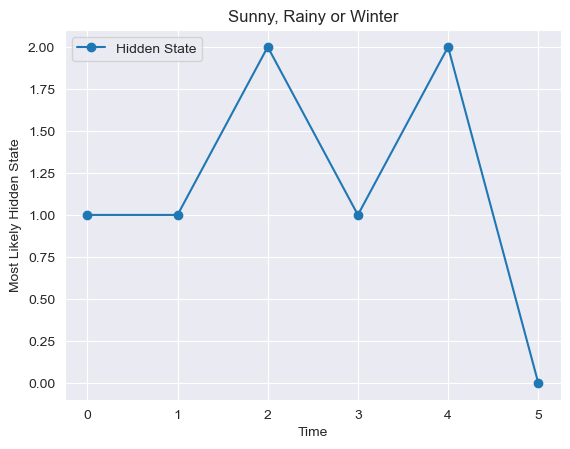

In [13]:
sns.set_style("darkgrid")  
plt.plot(hidden_states, '-o', label="Hidden State")  
plt.xlabel('Time')  
plt.ylabel('Most Likely Hidden State')  
plt.title("Sunny, Rainy or Winter")  
plt.legend()  
plt.show()  